# Importing Necessary Python Libraries

In [105]:
## pandas is used to read in the Titanic dataset as a CSV file.
import pandas as pd
import numpy as np
import seaborn as sns

## used to visualize and plot things
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Loading in the Titanic Dataset

To load in the titanic dataset, we are pulling the data from Github. To do this, we copied the link for the raw data from Github and used the pandas 'read_csv' function to read in the data. 

In [109]:
## loading in the Titanic dataset
titanic_data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv')

In [111]:
## viewing the first 10 entries in the Titanic dataset
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Data Clean-Up 

In [114]:
# Fill missing values for 'Age' column using the mean values
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True);
titanic_data.head(10)

C:\Users\rachi\AppData\Local\Temp\ipykernel_13684\2484398006.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True);


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [116]:
## viewing the first 10 entries in the Titanic dataset
titanic_data['Sex'] = titanic_data['Sex'].map({'female': 0, 'male': 1})
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NaN,C


In [118]:
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)
titanic_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
5,0,3,1,29.699118,0,0,8.4583
6,0,1,1,54.000000,0,0,51.8625
7,0,3,1,2.000000,3,1,21.0750
8,1,3,0,27.000000,0,2,11.1333
9,1,2,0,14.000000,1,0,30.0708


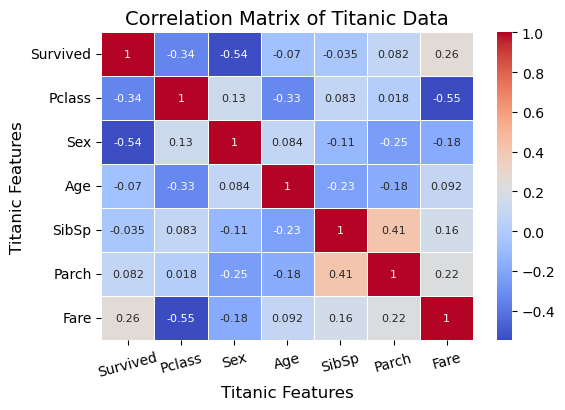

In [122]:
correlation_matrix = titanic_data.corr()

## plotting a heatmap 
plt.figure(figsize = (6,4))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', linewidths = 0.5, fmt = '.2g', annot = True, annot_kws = {"size": 8})
plt.title('Correlation Matrix of Titanic Data', fontsize = 14)
plt.xticks(rotation=15)
plt.xlabel('Titanic Features', fontsize = 12)
plt.ylabel('Titanic Features', fontsize = 12)
plt.show()

# Train-Test Split

In [127]:
titanic_features = titanic_data.drop('Survived', axis = 1)
titanic_target = titanic_data['Survived']

In [129]:
x_train, x_test, y_train, y_test = train_test_split(titanic_features, titanic_target, test_size = 0.25, random_state = 0)

# Decision Tree

In [136]:
decision_tree_titanic = DecisionTreeClassifier(random_state = 0)
decision_tree_titanic.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [138]:
# Predict and evaluate on validation set
y_pred_dt = decision_tree_titanic.predict(x_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7937219730941704
Confusion Matrix:
 [[118  21]
 [ 25  59]]


In [140]:
y_pred_dt = decision_tree_titanic.predict(x_train)
print('Decision Tree Accuracy:', accuracy_score(y_train, y_pred_dt))
print('Confusion Matrix:\n', confusion_matrix(y_train, y_pred_dt))

Decision Tree Accuracy: 0.9805389221556886
Confusion Matrix:
 [[410   0]
 [ 13 245]]


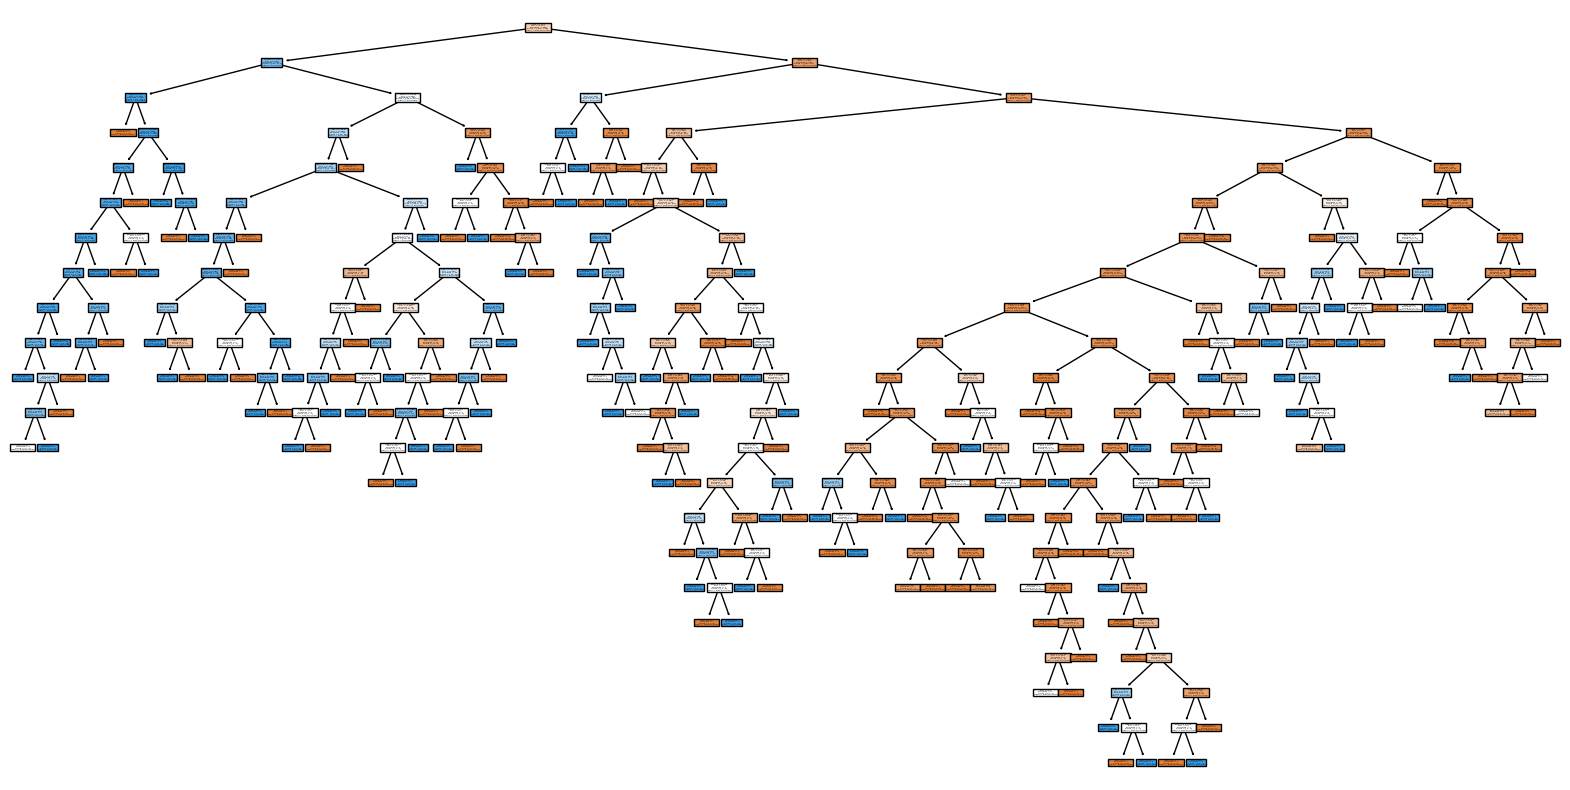

In [142]:
# Assuming you've already trained a DecisionTreeClassifier named `dt_model`
plt.figure(figsize=(20,10))  # Set the figure size for better visibility
plot_tree(decision_tree_titanic, feature_names=titanic_features.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

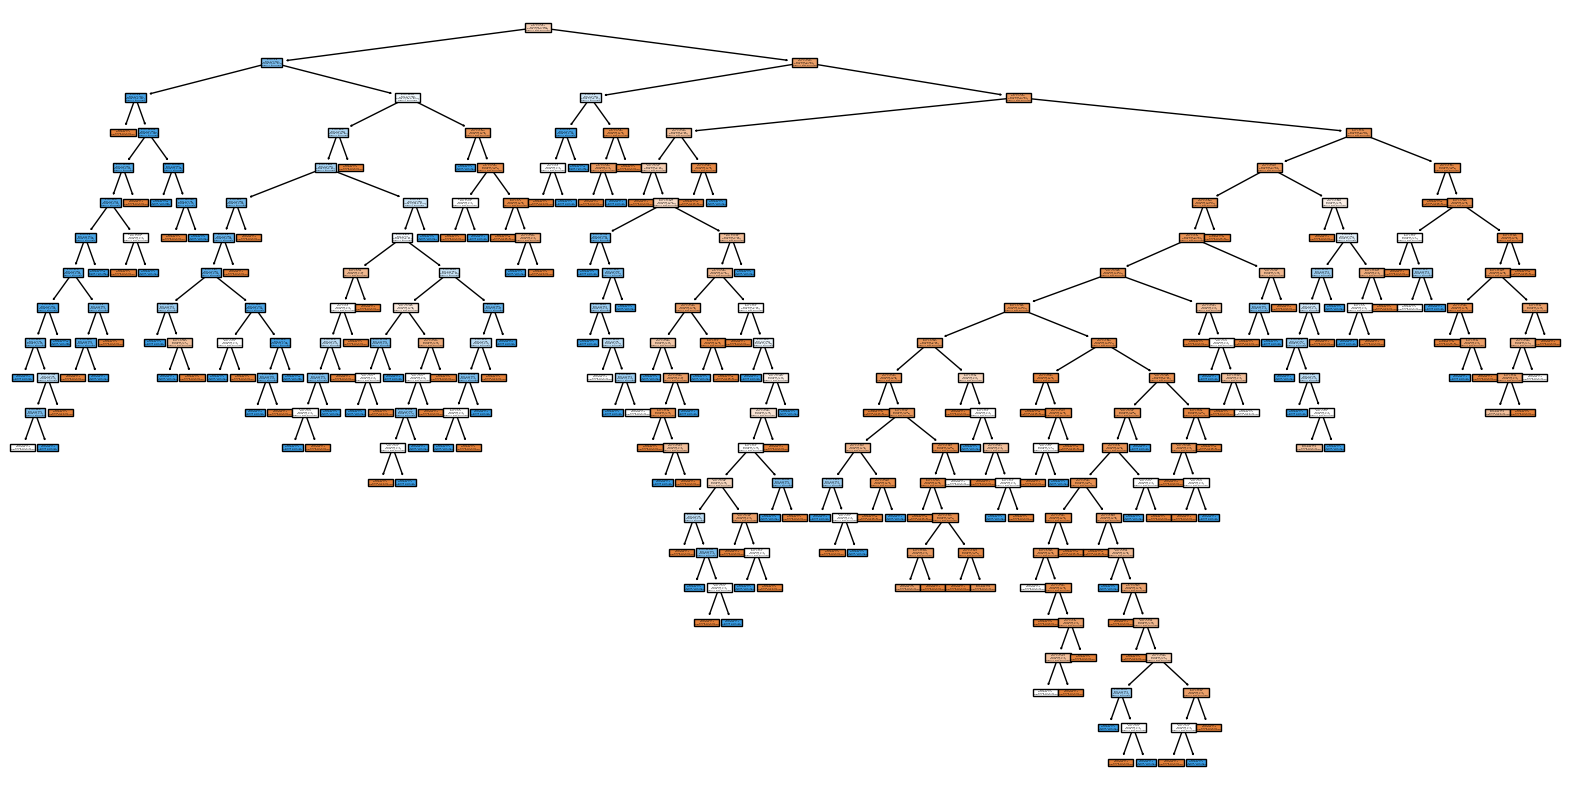

In [146]:
# Assuming you've already trained a DecisionTreeClassifier named `dt_model`
plt.figure(figsize=(20,10))  # Set the figure size for better visibility
plot_tree(decision_tree_titanic, feature_names=titanic_target, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()